<a href="https://colab.research.google.com/github/hwangjunseong/my-first-website/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(%EB%8B%A4)%EB%B0%98_7%EC%A1%B0(%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%98%EC%A1%B0)private_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사용할 라이브러리

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy.linalg as lin

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
#import lightgbm as lgb
!pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install Pillow pandas


In [ ]:
import cv2
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 흑백으로 읽기
    img_array = np.array(img).reshape(-1)  # 1차원 배열로 변환
    print(img_array.shape)
    return img_array

def process_images(image_paths):
    image_data = []
    for path in image_paths:
        img_array = preprocess_image(path)
        image_data.append(img_array)
    return image_data


  # priviate data load
private_data_size = 15000
file_name_array = []
for file_name_number in range(private_data_size):
    file_name = f"{file_name_number:05d}"
    file_name_array.append("/content/drive/MyDrive/Colab Notebooks/private_test/data/" + file_name + ".png")
image_data = process_images(file_name_array)
private_data = pd.DataFrame(image_data)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,

Private data successfully saved to CSV file: /content/drive/MyDrive/Colab Notebooks/private_test/private_data.csv


In [ ]:
print(len(private_data))

15000


In [ ]:
()# CSV 파일로 저장 (header=False를 추가하여 헤더를 포함하지 않음)
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/private_test/private_data2.csv"
private_data.to_csv(csv_file_path, index=False, header=False)

print(f"Private data successfully saved to CSV file: {csv_file_path}")


Private data successfully saved to CSV file: /content/drive/MyDrive/Colab Notebooks/private_test/private_data2.csv


데이터 모으기 , 종속변수 벡터와 독립변수 벡터를 분리하기

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/private_test/private_data.csv")



X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values
#X_test= private_data.iloc[:,:].values
X_test= test.iloc[:,:].values

#X_test= private_data.iloc[:,1:].values
#y_test=private_data.iloc[:,0].values

#y_train = np.array(y_train).ravel()#2차원 배열을 1차원 배열로 변경
#y_test = np.array(y_test).ravel()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

pca를 진행하기전에 정규화[0, 1]  안에 있는 표준화 보통 [-3,3]에 값이 위치 선택

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train.shape
#scaler_minmax=MinMaxScaler()
#X_train = scaler_minmax.fit_transform(X_train)
#X_test = scaler_minmax.transform(X_test)

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(15000, 784)

In [ ]:
#scaler_X = StandardScaler()
#scaler_y = StandardScaler()
#X_train_std = scaler_X.fit_transform(X_train)
#X_test_std = scaler_X.transform(X_test)

In [ ]:


# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# datagen = ImageDataGenerator(


#     zoom_range=0.2,

# )

# # 증강된 이미지를 훈련 데이터에 추가
# augmented_images = datagen.flow(X_train, y_train, batch_size=60000, shuffle=False)

# # 증강된 이미지를 X_train과 y_train에 추가
# X_train_augmented, y_train_augmented = augmented_images.next()
# X_train = np.vstack([X_train, X_train_augmented])
# y_train = np.hstack([y_train, y_train_augmented])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# ImageDataGenerator 설정
datagen = ImageDataGenerator(

    width_shift_range=0.2,      # 좌우 이동 범위
    height_shift_range=0.2,     # 상하 이동 범위
    shear_range=0.2,            # 변형 정도
    zoom_range=0.2,             # 확대/축소 범위

)

# 데이터를 여러 번 증강
num_augmentations = 10  # 증강 횟수를 지정
X_train_augmented_list = []
y_train_augmented_list = []

for _ in range(num_augmentations):
    augmented_images = datagen.flow(X_train, y_train, batch_size=3000, shuffle=False)
    X_train_augmented, y_train_augmented = augmented_images.next()
    X_train_augmented_list.append(X_train_augmented)
    y_train_augmented_list.append(y_train_augmented)

# 리스트에 저장된 모든 이미지를 수직으로 쌓음
X_train = np.vstack([X_train] + X_train_augmented_list)
y_train = np.hstack([y_train] + y_train_augmented_list)


In [ ]:
X_train.shape

(120000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
print(X_train.shape)

(120000, 784)


In [ ]:
y_train.shape

(120000,)

In [ ]:
#입렦값으로 2차원 배열을 요구한다

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_test_std = scaler_X.transform(X_test)
#y_train = scaler_y.fit_transform(y_train)
#print(np.mean(X_train_std))

PCA

In [ ]:

# PCA 모델 생성
pca = PCA(n_components=0.95, svd_solver='auto')
X_train_reduced = pca.fit_transform(X_train_std)
X_test_reduced = pca.transform(X_test_std)
#print(X_train_reduced)

In [ ]:
n_components = pca.n_components_
print(f'Number of components: {n_components}')

Number of components: 173


In [ ]:
print(len(set(y_train)))

10


In [ ]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda = LDA(n_components = 9)
#X_train_reduced = lda.fit_transform(X_train_reduced, y_train)
#X_test_reduced = lda.transform(X_test_reduced)

In [ ]:
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 784, kernel = 'rbf')
# X_train_reduced = kpca.fit_transform(X_train_reduced)
# X_test_reduced = kpca.transform(X_test_reduced)

In [ ]:
def plot_scree(X, max_dim):
    pca = PCA(n_components=max_dim)
    pca.fit(X)
    eigenvalues = pca.explained_variance_
    plt.plot(np.arange(1, max_dim+1), eigenvalues, 'o-', linewidth=2)
    plt.xlabel('Number of components')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot')
    plt.show()

In [ ]:
#plot_scree(X_train_reduced, 0.95)

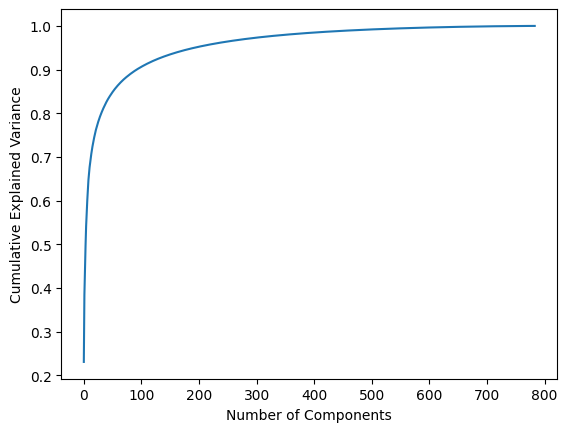

In [ ]:

# 데이터를 X에 로드하고 정규화 등의 전처리 수행

# PCA 모델 생성
pca = PCA()
pca.fit(X_train_std)

# 누적 설명 분산량 확인
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# 그래프로 시각화
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
#xgb:accuracy : 87.39 %
#표준편차:  0.25 %
#SVM: accuracy : 87.54 %
#표준편차:  0.29 %
#lgb:accuracy : 87.05 %
#표준편차:  0.26 %
#hist:accuracy : 87.03 %
#표준편차:  0.25 %
#randomforest: accuracy : 86.50 %
#표준편차:  0.30 %

모델 선택 => k폴더 교차검증,그리디 서치=> 최적의 parameter찾기,  앙상블


In [ ]:
model=SVC(kernel = 'rbf', gamma = "auto", C=40, probability = True, random_state = 42) #0.95, C =40
model.fit(X_train_reduced, y_train)

print('학습 데이터 : {}'.format(model.score(X_train_reduced,y_train))) #0.997
#print('평가 데이터 : {}'.format(model.score(X_test_reduced,y_test)))
y_pred = (model.predict(X_test_reduced))
print(X_test_reduced)
print(y_pred)

file_path = "/content/drive/MyDrive/Colab Notebooks/testResult.txt"
with open("testResult.txt", "w") as f:
    for index, prediction in enumerate(y_pred):
      index_str = f"{index:05d}" #5자리의 길이로 표시하고, 빈 자리는 0으로 채우는 문자열을 생성
      result = f"{index_str} {int(prediction)}"
      f.write(result + "\n")


In [ ]:
model=SVC(kernel = 'rbf', gamma = "auto", C=40, probability = True, random_state = 42) #0.95, C =40
model.fit(X_train_reduced, y_train)

print('학습 데이터 : {}'.format(model.score(X_train_reduced,y_train))) #학습 데이터 : 0.9999583333333333
#print('평가 데이터 : {}'.format(model.score(X_test_reduced,y_test)))

학습 데이터 : 0.9999583333333333


In [ ]:
#svm_model = SVC(kernel = 'rbf', probability = True, C= svr['C'], random_state = 42)

svm_model = SVC(kernel = 'rbf', probability = True, gamma = "auto", C= 40, random_state = 42)
classifier_xgb = XGBClassifier( n_estimators= 300, gamma = 0, random_state = 42)

#rf_model = RandomForestClassifier( random_state=42)
#lgb_model = lgb.LGBMClassifier(n_estimators = 300, random_state = 42)
#hist_gb_model = HistGradientBoostingClassifier(max_iter=100, random_state=42)

#cat_model = CatBoostClassifier(iterations=100,  # 반복 횟수
 #                          learning_rate=0.05,  # 학습률
  #                         depth=10,  # 트리 깊이
   #                        loss_function='MultiClass',  # 다중 클래스 분류용 손실 함수
    #                       custom_metric='Accuracy')


#lgb_model = lgb.LGBMClassifier(n_estimators = lm['n_estimators'], random_state = 42)
#hist_gb_model = HistGradientBoostingClassifier(learning_rate = hgm['learning_rate'],max_iter=100, random_state=42)
#rf_model = RandomForestClassifier(criterion = "entropy", random_state=42)

#model = VotingClassifier(
#    estimators=[ ('rf', rf_model),('hist_gb', hist_gb_model),('lm', lgb_model), ('cx', classifier_xgb), ('svc', svm_model)], voting='soft')

#model = VotingClassifier(
 #   estimators=[  ('lm', lgb_model), ('cx', classifier_xgb), ('rm', rf_model),('svc', svm_model)], voting='soft')
#model.fit(X_train_reduced, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.831375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134130
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 526
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

VotingClassifier(estimators=[('lm',
                              LGBMClassifier(n_estimators=300,
                                             random_state=42)),
                             ('cx',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importanc...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rm',
                              RandomForestClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('svc',
                              SVC(C=40, gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

test데이터로 예측

In [ ]:
#np.array(X_test_reduced).ravel()

y_pred = (model.predict(X_test_reduced))
print(X_test_reduced)
print(y_pred)

NameError: ignored

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
#TN FP            TP          TP
#FN TP 정밀도는 TP+FP 재헌율 TP+FN
#accuracy_score(y_test, y_pred)

[[860   0  13  16   1   0  95   0  15   0]
 [  4 987   1   7   0   0   0   0   1   0]
 [ 14   1 852  12  62   0  52   0   7   0]
 [ 24  12   9 920  22   0  12   0   1   0]
 [  4   1  58  22 877   0  36   0   2   0]
 [  0   0   0   0   0 952   1  27   9  11]
 [117   1  55  27  50   0 732   0  18   0]
 [  0   0   0   0   0   7   0 956   0  37]
 [  1   0   4   2   1   1   4   2 985   0]
 [  0   0   0   0   0   4   0  31   8 957]]


0.9078

혼동행렬 사용하여 정확도 예측

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
#TN FP            TP          TP
#FN TP 정밀도는 TP+FP 재헌율 TP+FN
#accuracy_score(y_test, y_pred)

[[865   0  13  17   1   1  88   0  15   0]
 [  3 986   1   8   0   0   1   0   1   0]
 [ 15   1 853  13  61   0  50   0   7   0]
 [ 27  12  11 916  21   0  12   0   1   0]
 [  4   1  59  25 873   0  36   0   2   0]
 [  0   0   0   0   0 951   1  27  10  11]
 [116   1  59  28  45   0 733   0  18   0]
 [  0   0   0   0   0   7   0 956   0  37]
 [  2   0   4   2   1   1   3   2 985   0]
 [  0   0   0   0   0   4   0  31   8 957]]


0.9075

예측된 클래스 값을 testResult.txt 파일에 저장

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/testResult.txt"
with open("testResult.txt", "w") as f:
    for index, prediction in enumerate(y_pred):
      index_str = f"{index:05d}" #5자리의 길이로 표시하고, 빈 자리는 0으로 채우는 문자열을 생성
      result = f"{index_str} {int(prediction)}"
      f.write(result + "\n")


In [ ]:
with open("testResult.txt", "r") as f:
    content = f.read()

#print(content)

In [ ]:
import sys
import numpy as np
from sklearn.metrics import auc
from collections import Counter

testResult_path = sys.argv[1]
label_path = sys.argv[2]

# pred에 해당하는 testResult.txt 파일 읽어오는 부분입니다.
with open("testResult.txt", "r") as f:
    preds = f.readlines()

# 정답에 해당하는 label.txt 파일 읽어오는 부분입니다.
with open("/content/drive/MyDrive/Colab Notebooks/label.txt", 'r') as file2:
    labels = file2.readlines()


# pred와 label의 클래스값만 리스트로 변환하는 부분입니다.
p = np.array([pred.strip().split()[1] for pred in preds])
l = np.array([label.strip().split()[1] for label in labels])

# pred의 클래스 개수를 count하는 부분입니다.
predict_label_count_dict = Counter(p)
predict_label_count_dict = dict(sorted(predict_label_count_dict.items()))

## mAP 계산하는 부분입니다.
AP = []
num_class = 10

# 모든 클래스에 대해 반복
for c, freq in predict_label_count_dict.items() :
    TP = 0
    FN = 0

    temp_precision = []
    temp_recall = []

    for i in range(len(p)):
        # TP, FN 계산
        if l[i] == c and p[i] == c :
            TP += 1
        elif l[i] != c and p[i] == c :
            FN += 1

        # preciison, recall 계산
        if TP+FN != 0:
            temp_precision.append(TP/(TP+FN))
            temp_recall.append(TP/freq)

    # AP 배열에 클래스 각각의 AP value 저장
    # auc : preciison-recall curve의 면적 구해줌
    AP.append(auc(temp_recall, temp_precision))

mAP = sum(AP) / num_class

# 각각의 클래스에 대한 AP와 mAP의 Table 출력 부분입니다.
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
table = "| {:<13} | {:<13} |\n".format("Class", "AP") + "|---------------|---------------|\n"

for c_name, ap in zip(class_name, AP):
    table += "| {:<13} | {:<13.2f} |\n".format(c_name, ap)

table += "| {:<13} | {:<13.2f} |\n".format("mAP", mAP)

print(table)

| Class         | AP            |
|---------------|---------------|
| T-shirt/top   | 0.69          |
| Trouser       | 0.97          |
| Pullover      | 0.74          |
| Dress         | 0.84          |
| Coat          | 0.74          |
| Sandal        | 0.97          |
| Shirt         | 0.62          |
| Sneaker       | 0.88          |
| Bag           | 0.89          |
| Ankle boot    | 0.91          |
| mAP           | 0.82          |



In [ ]:


#현재 각 클래스에 대한 불균형은 없는 상태이다 각 클래스 6천개씩 되어있음